# Esercitazione 9

In [1]:
#Librerie necessarie

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import time, sys
import pylab as pl

## Introduzione

Le cartelle contengono i codici utilizzati per la risoluzione degli esercizi e i risultati di ciascun calcolo. Essi verranno analizzati all'interno del notebook, per un controllo del corretto funzionamento del codice è sufficente compilare utilizzando il comando "make run" all'interno della cartella dell'esercitazione corrispondente per ottenere nuovi risultati di output.

## Es 09.1


Uno dei classici problemi di ottimizzazione è quello del Traveling Salesman (TSP). Il TSP consiste in una serie di città disposte randomicamente su un piano e un venditore che ha il compito di visitarle tutte con l'obiettivo di percorrere la minima strada. Gli unici constraints del problema consistono nell'impossibilità di tornare in una già visitata e nel dover necessariamente concludere il viaggio nella città di partenza. Di conseguenza, considerando $N$ città, lo scopo è quello di minimizzare la funzione costo:$$L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2 \, ,$$dove $\vec{x}_i$ rappresenta la posizione della i-esima città.

Di seguito è illustrato l'algoritmo genetico (GA) implementato per risolvere il precedente modello nel caso di $N=32$ città disposte lungo una circonferenza di raggio unitario e all'interno di un quadrato di lato unitario.

##### ALGORITMO GENETICO

L'implementazione dell'intero algoritmo è avvenuta costruendo una classe che sfrutta una rappresentazione 1D del percorso intrapreso dal venditore (e.g. la stringa di città $\left[0,1,2,...31\right]$ indica che il viaggiatore visita la città 0 al tempo 0, poi la 1 al tempo 1 e così via).

Per poter eseguire l'algoritmo è necessaria una configurazione di partenza: la prima generazione, cioè l'insieme di tutti i primi genitori, è ottenuta attraverso una permutazione casuale di una stringa standard di città ($\left[0,1,2,...31\right]$). Per poter verificare che le città generate rispettino i constraint del problema è stata implementata una funzione apposita che viene chiamata ogni volta che una nuova generazione viene prodotta. Lo scheletro dell'algoritmo consiste in 3 fasi principali: Selezione, Crossover, Mutazione.

- ##### Selezione

Questa fase consiste nel selezionare i possibili genitori (percorsi/sequenze di città) tra tutti quelli possibili, cioè quelli che potranno accedere alla fase successiva. Questa fase ha lo scopo di permettere ai genitori che minimizzazano la loss function, cioè le soluzioni migliori, di protrarre i loro geni attraverso le generazioni successive. Per questo motivo è stato necessario implementare un metodo che valuti la grandezza $L^{(2)}(\vec{x}_0,\vec{x}_1,\dots, \vec{x}_N) =\sum_{i=0}^{32} |\vec{x}_i-\vec{x}_{i+1}|^2 $ imponendo che l'ultima città visitata sia la hometown.

Sono stati implementati due diversi metodi di selezione:

- un primo metodo prevede la selezione dei possibili genitori prendendo in considerazione $\frac{1}{4}$ di quelli con le distanze minori e scegliendone casualmente tra $\frac{1}{5}$ e $\frac{1}{2}$ sempre nelle stesso gruppo. In seguito tra tutti questi vengono indivuidati quelli a cui applicare il crossover in maniera randomica;
- un secondo metodo prende in considerazione tutti quelli con le distanze minori e selezionando tra questi l'individuo $j=N\times int(r^p)$ dove $r$ è un numero casuale $\in[0,1)$ e $p$ è un esponente scelto in modo tale da rendere più o meno stringente la selezione.

- ###### Crossover

Questa fase ha lo scopo di mischiare i patrimoni genetici di tutti i genitori precedentemente selezionati (gli ottimali) così da poter ottenere generazioni ancora migliori rispetto alle precedenti.

Sono stati implementati due diversi metodi di crossover:

- un primo metodo prevede la creazione di un nuovo singolo individuo a partire da due (i,j) precedentemente selezionati. Viene selezionato casualmente un intervallo di città di un genitore che verrà mantenuto nel "figlio" mentre le restanti città visitate da quest'ultimo vengono ottenute prendendo le città nell'ordine in cui appaiono nel secondo genitore. Ad esempio considerando due genitori:$$\left[1,3,5,4,2\right] \quad \left[1,2,3,4,5\right];$$il figlio viene generato a partire da un intervallo casuale di città del primo genitore:$$\left[\, ,\, ,5,4, \, , \, \right];$$infine vengono inserite le città mancanti leggendole in ordine dell'altro genitore:$$\left[1,2,5,4,3 \right].$$Questo metodo non richiede una probabilità come parametro esterno. Inoltre non è stata esclusa la possibilità di una "clonazione", cioè un crossover in cui i genitori sono uguali. In questo modo è stato così implementato una sorta di Solutions Generational Genetic Algorithm in cui l'interà popolazione viene sostituita però con la probabilità che si riduca a un Steady-state GA nel caso di clonazione;
- un secondo metodo prevede la creazione di due individui a partire da due (i,j) precedentemente selezionati con una certa probilità ($> 50\%$) scelta esternamente. Viene selezionato un intervallo di città di uguale lunghezza in entrambi i genitori che verranno mantenuti rispettivamente nei due figli mentre le restanti città visitate dai figli vengono ottenute prendendo le città nell'ordine in cui appaiono nel corrispondente genitore che non li ha generati. Ad esempio considerando due genitori:$$
\left[ 1, 2, 3, 4, 5 \right] \quad \left[ 1, 5, 4, 3, 2 \right] 
$$si considera lo stesso intervallo in entrambi i genitori:$$
\left[ 1, 2, 3 | 4, 5 \right] \quad \left[ 1, 5, 4 | 3, 2 \right] 
$$e viene conservato per dare origine ai figli:$$
\left[ 1, 2, 3 | X, Y \right] \quad \left[ 1, 5, 4 | X, Y \right] 
$$si riempiono le parti mancati nell'ordine in cui appaiono nel "consorte":$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Si nota che entrambi i metodi sono stati implementati mantendo costante il numero di individui nella generazione

- ###### Mutazione

Questa fase ha lo scopo principale di aggiungere della diversità nel patrimonio genetico dei genitori che hanno superato le due fasi precedenti introducendo un'ulteriore componente stocastica che, se dovesse presentarsi, distruggerebbe le soluzioni trovate fino a quel momento però permettendo all'algoritmo di non "stagnare" e rendendolo quindi più ergodico. Di conseguenza la mutazione può accadere con una probabilità $ < 10 \%$ scelta esternamente. Inoltre la mutazione agisce sul singolo individuo della generazione e per tutta la generazione.

Sono stati implementati 4 diversi tipi di mutazioni:

- un primo metodo prevede una permutazione tra una coppia di città scelte casualmente per ogni individuo della generazione;
- un secondo metodo prevede una permutazione di $m$ città contigue scelte casualmente per ogni individuo della generazione;
- un terzo metodo prevede una traslazione di $n$ posti di tutte città dove $n$ è scelto casulamente in $[0,31]$ per ogni individuo della generazione;
- un quarto medodo prevede una traslazione di $n$ posti di $m$ città dove $n$ è scelto casulamente rispettivamente in $[0,31]$ e $m$ in modo tale da escludere le traslazioni che necessitano di condizioni periodiche al contorno.

Inoltre è presente un metodo che ad ogni generazione sceglie casualmente quale delle precedenti mutazioni applicare.

La fase successiva è stata quella di testare le diverse combinazioni di tutti i metodi implemetnati per tutti le fasi con lo scopo di ottenere quella che minimizzasse la distanza percorsa. Siccome si stratta di algoritmo metaeuristico non si può avere mai la certezza di aver raggiunto un minimo globale, di conseguenza si riporta di seguito la combinazione di parametri per la quale si è ottenuta la soluzione migliore. Inoltre è stata anche testata la possibilità di raggiungere la soluzione migliore escludendo dall'algoritmo il crossover (mantenendo solo la mutazione) ma con esito negativo.

|Disposizione città	|Numero genitori	|Numero di generazioni	|Probabilità di mutazione |
|---------------|----------------|----------------|-------------|
|Circonferenza	|$600$	|$500$	|$8\%$ |
|Quadrato	|$600$	|$500$	|$8\%$ |	

I metodi che mi hanno permesso di otteneri questi parametri ottimali sono :

Selezione $\rightarrow$ CrossOver $\rightarrow$ Mutazione

In generale si è osservata una forte dipendenza dell'esito della simulazione in base al valore scelti dei parametri in tabella e dai metodi utilizzati. Una scelta non oculata può far si che l'algoritmo non converga più ad un minimimo.

Di seguito sono riportati i grafici, per entrambi i cai in esame, della minima distanza quadratica $L^{(2)}$ e della distanza quadratica media $\langle L^{(2)}\rangle$ calcolata sul $50 \%$ dei genitori migliori della popolazione con i rispettivi errori in funzione del numero di generazioni. Viene mostrato inoltre miglior percorso ottenuto all'ultima generazione.

Distanza minima quadratica percorsa dal venditore sulla circonferenza:  3.16799


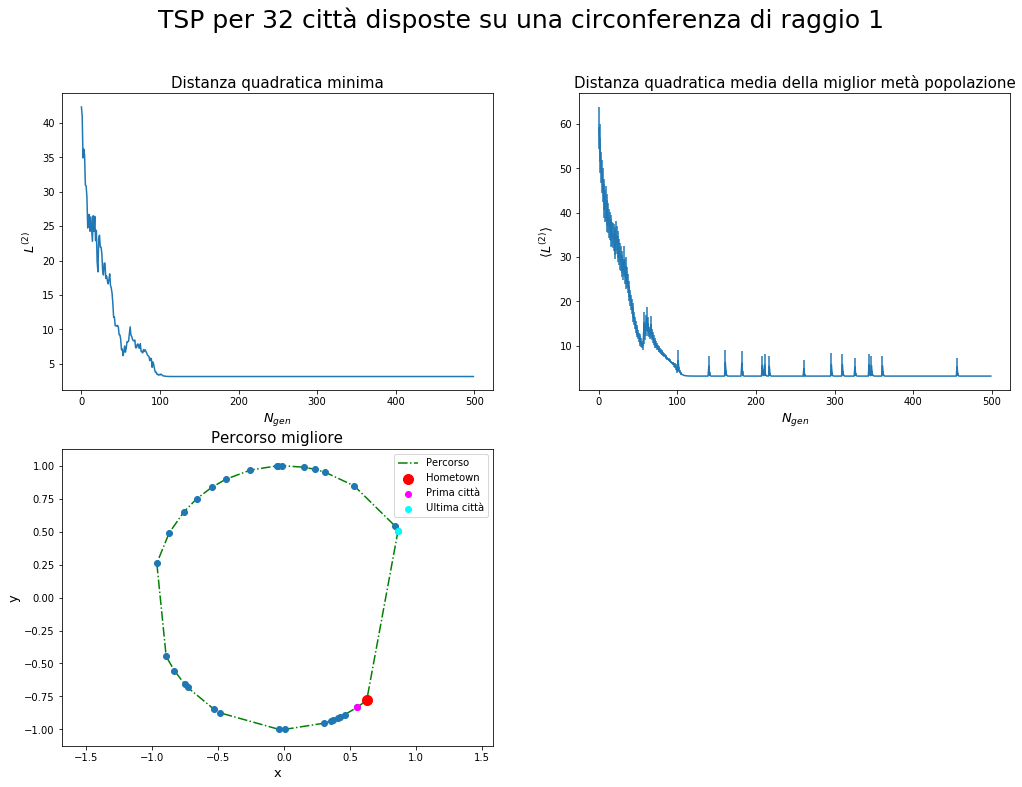

In [2]:
plt.figure(figsize=(17,12))
plt.suptitle('TSP per 32 città disposte su una circonferenza di raggio 1',fontsize=25) 

plt.subplot(2,2,1)
L = np.loadtxt("9/distance_circle.out", usecols=(0), unpack='true')
plt.plot(L)
plt.title('Distanza quadratica minima',fontsize=15)
plt.xlabel(r"$N_{gen}$", fontsize = 13)
plt.ylabel(r"$L^{(2)}$", fontsize = 13)
print('Distanza minima quadratica percorsa dal venditore sulla circonferenza: ', L[len(L)-1])

plt.subplot(2,2,2)
L ,r, y= np.loadtxt("9/distance50_circle.out", usecols=(0,1,2), unpack='true')
plt.errorbar(L,r,y)
plt.title('Distanza quadratica media della miglior metà popolazione',fontsize=15)
plt.xlabel(r"$N_{gen}$", fontsize = 13)
plt.ylabel(r"$\langle L^{(2)}\rangle$", fontsize = 13)

plt.subplot(2,2,3)
x,y = np.loadtxt("9/path_circle.out", usecols=(0,1), unpack='true')
plt.plot(x,y,zorder=1,label = 'Percorso',linestyle = '-.', color = 'green') 
plt.scatter(x,y,zorder=2)
plt.scatter(x[0],y[0],s=100,label ='Hometown',color = 'red', zorder = 7)
plt.scatter(x[1],y[1],label ='Prima città',color = 'Magenta',zorder = 3)
plt.scatter(x[len(x)-2],y[len(y)-2],label ='Ultima città',color = 'cyan',zorder = 3)
plt.title('Percorso migliore',fontsize=15)
plt.axis("equal")
plt.xlabel("x", fontsize = 13)
plt.ylabel("y", fontsize = 13)
plt.legend()
plt.show()

Distanza minima quadratica percorsa dal venditore nel quadrato:  0.983457


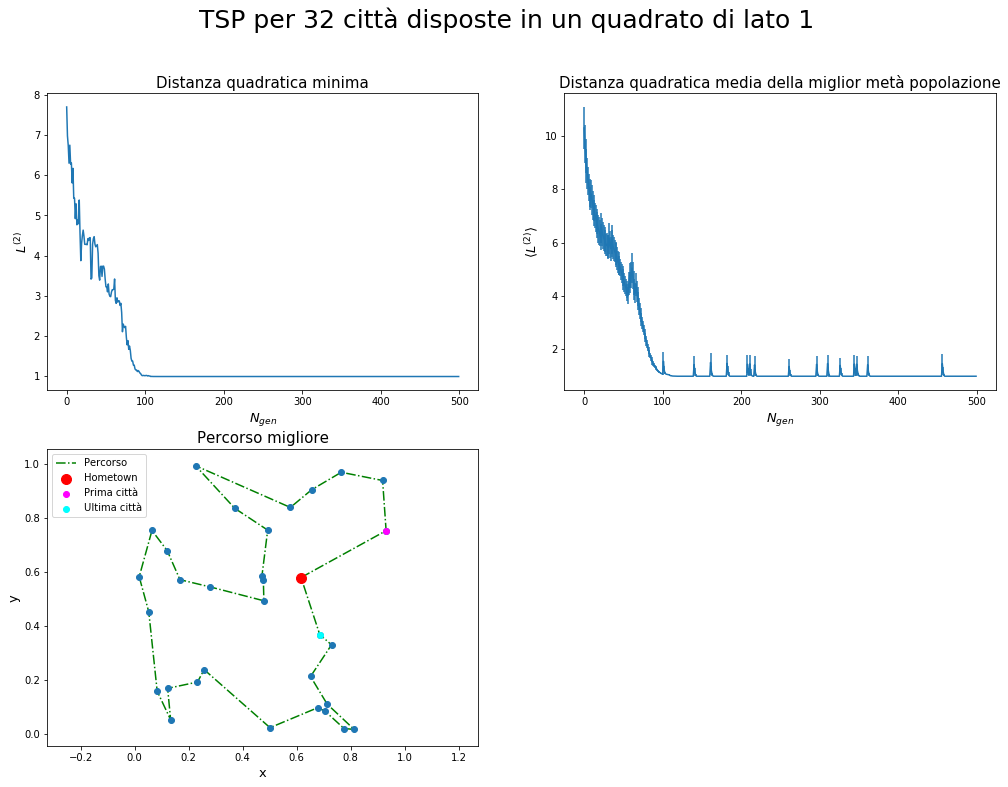

In [3]:
plt.figure(figsize=(17,12))
plt.suptitle('TSP per 32 città disposte in un quadrato di lato 1',fontsize=25) 

plt.subplot(2,2,1)
L = np.loadtxt("9/distance_square.out", usecols=(0), unpack='true')
plt.plot(L)
plt.title('Distanza quadratica minima',fontsize=15)
plt.xlabel(r"$N_{gen}$", fontsize = 13)
plt.ylabel(r"$L^{(2)}$", fontsize = 13)
print('Distanza minima quadratica percorsa dal venditore nel quadrato: ',L[len(L)-1])

plt.subplot(2,2,2)
L ,r, y= np.loadtxt("9/distance50_square.out", usecols=(0,1,2), unpack='true')
plt.errorbar(L,r,y)
plt.title('Distanza quadratica media della miglior metà popolazione',fontsize=15)
plt.xlabel(r"$N_{gen}$", fontsize = 13)
plt.ylabel(r"$\langle L^{(2)}\rangle$", fontsize = 13)

plt.subplot(2,2,3)
x,y = np.loadtxt("9/path_square.out", usecols=(0,1), unpack='true')
plt.plot(x,y,zorder=1,label = 'Percorso',linestyle = '-.', color = 'green') 
plt.scatter(x,y,zorder=2)
plt.scatter(x[0],y[0],s=100,label ='Hometown',color = 'red', zorder = 7)
plt.scatter(x[1],y[1],label ='Prima città',color = 'Magenta',zorder = 3)
plt.scatter(x[len(x)-2],y[len(y)-2],label ='Ultima città',color = 'cyan',zorder = 3)
plt.title('Percorso migliore',fontsize=15)
plt.axis("equal")
plt.xlabel("x", fontsize = 13)
plt.ylabel("y", fontsize = 13)
plt.legend()
plt.show()